# Demo for Nuclei Instance Segmentation

### Step 1:

* Put your training and test images under data/train and data/test

### Step 2: 

(Skip if you do not need mosaic)
* Some small training images may come from the same large image
* Use mosaic to recover the original image - this is useful for data augmentation

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
!python nuclei_mosaic.py --TRAIN_DIR data/train --MOSAIC_TRAIN_DIR data/mosaic_train

Loading data
Loading and resizing train images and masks ...
100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 145.49it/s]
Loading and resizing test images ...
100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 129.50it/s]
Data loaded
Calculating dominant hsv for each image
100%|███████████████████████████████████████████| 15/15 [00:14<00:00,  1.06s/it]
Calculating clusters
Images clustered
Images in cluster 0: 6
Images in cluster 1: 2
Images in cluster 2: 4
Images in cluster 0: 2
Images in cluster 1: 1
Images in cluster 2: 0
Loading and resizing train images and masks ...
100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 179.35it/s]
Loading and resizing test images ...
100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 168.76it/s]
Data loaded
Images before filtering: (1, 1040, 1392, 3)
Images after filtering: (238,)
{0: [8, 11, 7, 0]}
0


Example of a large image after mosaic:

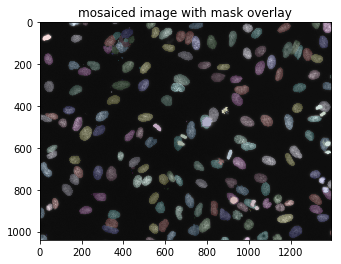

In [3]:
image = cv2.imread('data/mosaic_train/mosaic_000/mosaic_000_allmasks_overlaid.png')
plt.imshow(image)
plt.title('mosaiced image with mask overlay')

### Step 3:
* Split training and validation set

In [4]:
!python nuclei_trainvalsplit.py

### Step 4:
* Begin training

In [5]:
!python nuclei_train.py --dir_log logs

### Step 5:
* Inference on validation and test images
* For validation images: compute mAP
* model_path = the model you want to use, check it in logs/ and change the name here.

In [6]:
!python nuclei_inf.py --dir_log logs --model_path logs/nuclei_train20180101T0000/mask_rcnn_nuclei_train_0000.h5

### Step 6:
* Ensemble segmentation results
* model_names = list of models you want to ensemble
* You can set test_flag = False to ensemble validation results instead of test results

In [7]:
!python nuclei_ensemble.py --test_flag True --model_names nuclei_train20180101T0000_0000 nuclei_train20180102T0000_0001

### Step 7:
* Post-processing and generate run-length encoding

In [8]:
!python nuclei_postprocess.py

Example of segmentation overlay for single model and ensemble result.

This is trained only with 8 images provided in data/train in this repository.

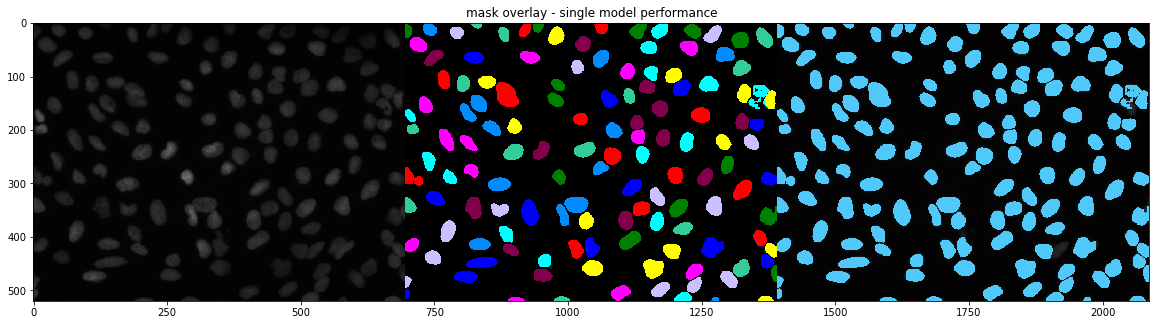

In [11]:
image = cv2.imread('data/masks_test/nuclei_train20180519T1243_0024/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_mask.png')
plt.figure(figsize=(20,80))
plt.imshow(image)
plt.title('mask overlay - single model performance')

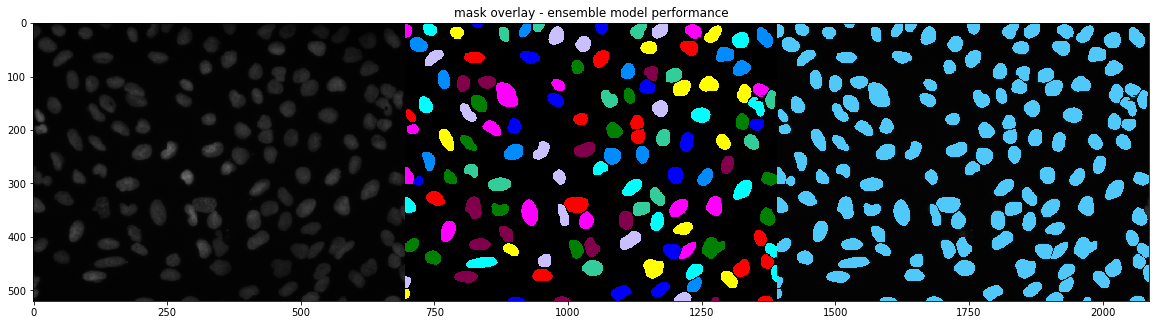

In [12]:
image = cv2.imread('data/masks_test_ensemble/ensemble_1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_mask.png')
plt.figure(figsize=(20,80))
plt.imshow(image)
plt.title('mask overlay - ensemble model performance')